# Malaysian Import & Export Analysis 2016
Let's see who Malaysia Trades with the most

*Data Source:*

[Import Data Source](http://www.data.gov.my/data/ms_MY/dataset/major-import-sources)

[Export Data Source](http://www.data.gov.my/data/ms_MY/dataset/major-export-destination)

### Importing Data

In [1]:
import pandas as pd

MY_export = pd.read_csv('Major Export Destination.csv').dropna()
MY_import = pd.read_csv('Major Import Sources.csv').dropna()

# checking for alignment before merging
(MY_export['Country']==MY_import['Country']).sum()==MY_export.shape[0]

True

In [2]:
# Total Trade Countries
MY_export['Country'].nunique()

234

In [3]:
df = pd.concat([MY_export, MY_import['Total Import (USD)']], axis=1)
df.head()

,Year,Month,Country,Country Code,Total Export (USD),Total Import (USD)
0,2016,1,AFGHANISTAN,AF,6533359,10609
1,2016,1,ALBANIA,AL,95077,7947
2,2016,1,ALGERIA,DZ,11758400,0
3,2016,1,AMERICAN SAMOA,AS,39681,0
4,2016,1,ANDORRA,AD,72293,0


In [4]:
# Re-arranging by Country and Month 
df = df.groupby(['Country','Month'])['Total Export (USD)','Total Import (USD)'].sum()
df.describe()

,Total Export (USD),Total Import (USD)
count,2.559000e+03,2.559000e+03
mean,7.411259e+07,6.581780e+07
std,2.754417e+08,2.690448e+08
min,0.000000e+00,0.000000e+00
25%,2.310670e+05,6.505000e+02
50%,2.316525e+06,3.490200e+05
75%,1.372884e+07,1.090205e+07
max,2.533374e+09,3.236290e+09


Based on the quick summary above things doesn't look good. (MAX Export)-(MAX Import) seems to indicate a Trade Deficit of -702,916,000 (USD) or 2.89 Billion Ringgit.

Wait.... let's not be too presumptuous and jump the gun here. That's not the whole picture. Let's dive into some charts and verify our assumption.

**Are you Hungry for some Data? I'll be separating it into a 5 full course meal. =)**

## Malaysia's Export

Let's see who's buying from us...

**Our starter Soup is....**

In [5]:
import matplotlib.pyplot as plt


# Top 10 Highest Export
Top10 = df.groupby(['Country'])['Total Export (USD)','Total Import (USD)'].sum()
Top10 = Top10.dropna().sort_values(['Total Export (USD)']).tail(10)

# Bar plot
Top10.plot.barh(title='Highest Export 2016 (USD)')

plt.show()

<Figure size 640x480 with 1 Axes>

**Singapore!** Well no surprise since they're SEA's Central Port (Free Trade Zone)
It's nice to see we're doing well with the US...

### Malaysia's Import

Up Next is our...**Appetizers** 

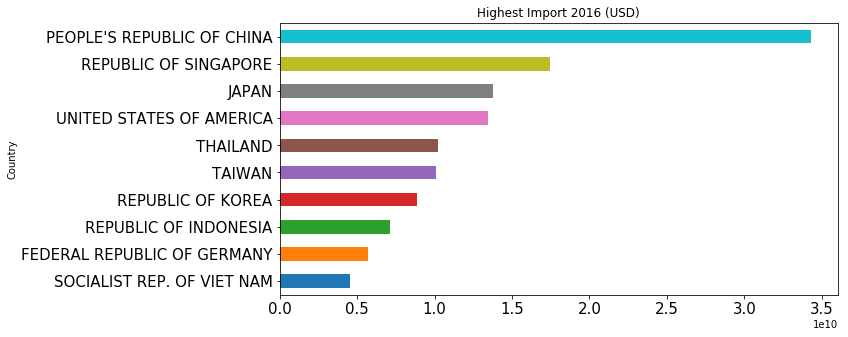

In [6]:
Buy10 = df.groupby(['Country'])['Total Import (USD)'].sum()

# 10 Highest Import
plt.figure(figsize=(10,5))
Top10 = Buy10.sort_values().tail(10)
Top10.plot("barh", fontsize=15, title='Highest Import 2016 (USD)')

plt.show()

**Hello China!!** Well you probably saw that comming. The phrase **"Made in China"** is not like what it used to be anymore.

Surprised to see Vietnam made it to the top10 list. I'm interested to know what we're buying from them.

# Trade Surplus/Deficit
**Now the Salad with extra mayo**

In [7]:
# FORMULA Surplus = Export - Import
df['Surplus'] = df['Total Export (USD)']-df['Total Import (USD)']
Surplus = df.groupby(['Country'])['Surplus'].sum()

print('Trade Surplus/Deficit of ({} USD)'.format(Surplus.sum()))
Surplus.describe()

Trade Surplus/Deficit of (21226371116 USD)


count    2.340000e+02
mean     9.071099e+07
std      1.279257e+09
min     -1.057737e+10
25%      6.400000e+01
50%      3.864355e+06
75%      4.652701e+07
max      1.013791e+10
Name: Surplus, dtype: float64

Wait what? (**21,226,371,116 USD**) is that a Positive Number?

That's right!! When combined, in 2016 we achieved (**RM 87,378,356,699**) Total Trade Surplus!

## Malaysia's loyal customers?? **Who are they?**
coming up our...**Main Dish**

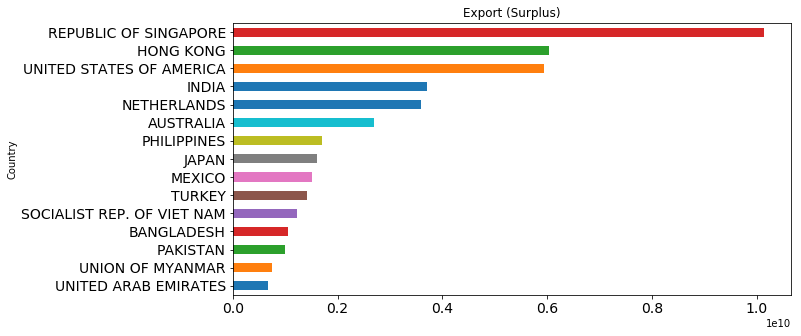

In [8]:
Gain = Surplus.sort_values().tail(15)

plt.figure(figsize=(10,5))
Gain.plot('barh', title='Export (Surplus)', fontsize=14)

plt.show()

Hey neighbour, how's it going?

yeap! Singapore. The Sibling rivalry, fighting over who invent the **Nasi Lemak** [Food Origin](https://goodyfeed.com/6-foods-that-both-singapore-and-malaysia-argued-to-have-invented/). But at the end of the day, Family supports each other. 

But Nasi Lemak's is from Malaysia. **Period**

### OK, then where are we spending our Money?

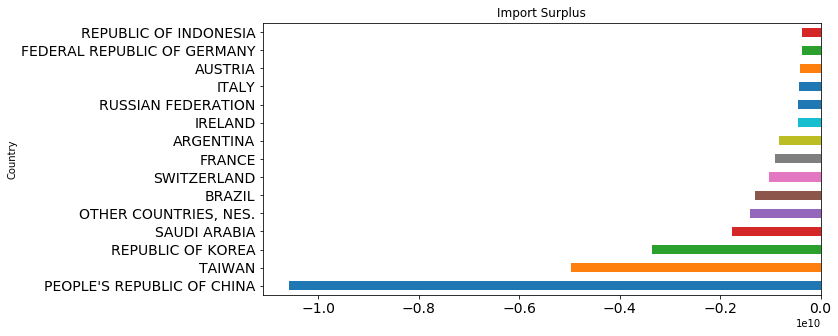

In [9]:
Spend = Surplus.sort_values().head(15)

plt.figure(figsize=(10,5))
Spend.plot('barh', title='Import Surplus', fontsize=14)

plt.show()

It's the elephant in the room isn't it?
It's no secret, even my family have been sourcing goods from China for years now.

*China Numbaaar One!*

# Malaysia-China ImportExport 
Finally our last course **The Dessert**

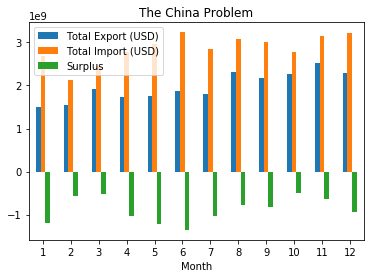

In [10]:
CN = df.loc["PEOPLE'S REPUBLIC OF CHINA"]

CN.plot.bar(rot=0, title='The China Problem')

plt.show()

#### Negative Surplus aka Trade Deficit

It's no wonder why Donald Trump's all worked up on the "Trade Deficit" issue.
China has come a long way since 1978. Today we're wondering if they are still socialist at heart.

There's a lesson to be learn here.
[War is inevitable, but what can we do about it?](https://www.ted.com/talks/graham_allison_is_war_between_china_and_the_us_inevitable?language=en)

Well that's all, I hope I managed to stir some curiouisity in you.

In [11]:
# Stay Curious
# Nate C.